In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv('credit_customers (1).csv')

In [5]:
df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,none,...,real estate,67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,none,...,real estate,22,none,own,1,skilled,1,none,yes,bad
2,no checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,none,...,real estate,49,none,own,1,unskilled resident,2,none,yes,good
3,<0,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,guarantor,...,life insurance,45,none,for free,1,skilled,2,none,yes,good
4,<0,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,none,...,no known property,53,none,for free,2,skilled,2,none,yes,bad


In [6]:
df.columns

Index(['checking_status', 'duration', 'credit_history', 'purpose',
       'credit_amount', 'savings_status', 'employment',
       'installment_commitment', 'personal_status', 'other_parties',
       'residence_since', 'property_magnitude', 'age', 'other_payment_plans',
       'housing', 'existing_credits', 'job', 'num_dependents', 'own_telephone',
       'foreign_worker', 'class'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   checking_status         909 non-null    object
 1   duration                1000 non-null   int64 
 2   credit_history          961 non-null    object
 3   purpose                 957 non-null    object
 4   credit_amount           1000 non-null   int64 
 5   savings_status          987 non-null    object
 6   employment              987 non-null    object
 7   installment_commitment  1000 non-null   int64 
 8   personal_status         1000 non-null   object
 9   other_parties           1000 non-null   object
 10  residence_since         1000 non-null   int64 
 11  property_magnitude      942 non-null    object
 12  age                     1000 non-null   int64 
 13  other_payment_plans     1000 non-null   object
 14  housing                 931 non-null    object
 15  exist

In [8]:
df.isnull().sum()

,0
checking_status,91
duration,0
credit_history,39
purpose,43
credit_amount,0
savings_status,13
employment,13
installment_commitment,0
personal_status,0
other_parties,0


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0
credit_amount,1000.0,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
installment_commitment,1000.0,2.973,1.118715,1.0,2.0,3.0,4.00,4.0
residence_since,1000.0,2.845,1.103718,1.0,2.0,3.0,4.00,4.0
age,1000.0,35.546,11.375469,19.0,27.0,33.0,42.00,75.0
existing_credits,1000.0,1.407,0.577654,1.0,1.0,1.0,2.00,4.0
num_dependents,1000.0,1.155,0.362086,1.0,1.0,1.0,1.00,2.0


In [10]:
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
print('lenght of numerical columns ',len(num_cols))
print('lenght of catgorical columns ',len(cat_cols))

lenght of numerical columns  7
lenght of catgorical columns  14


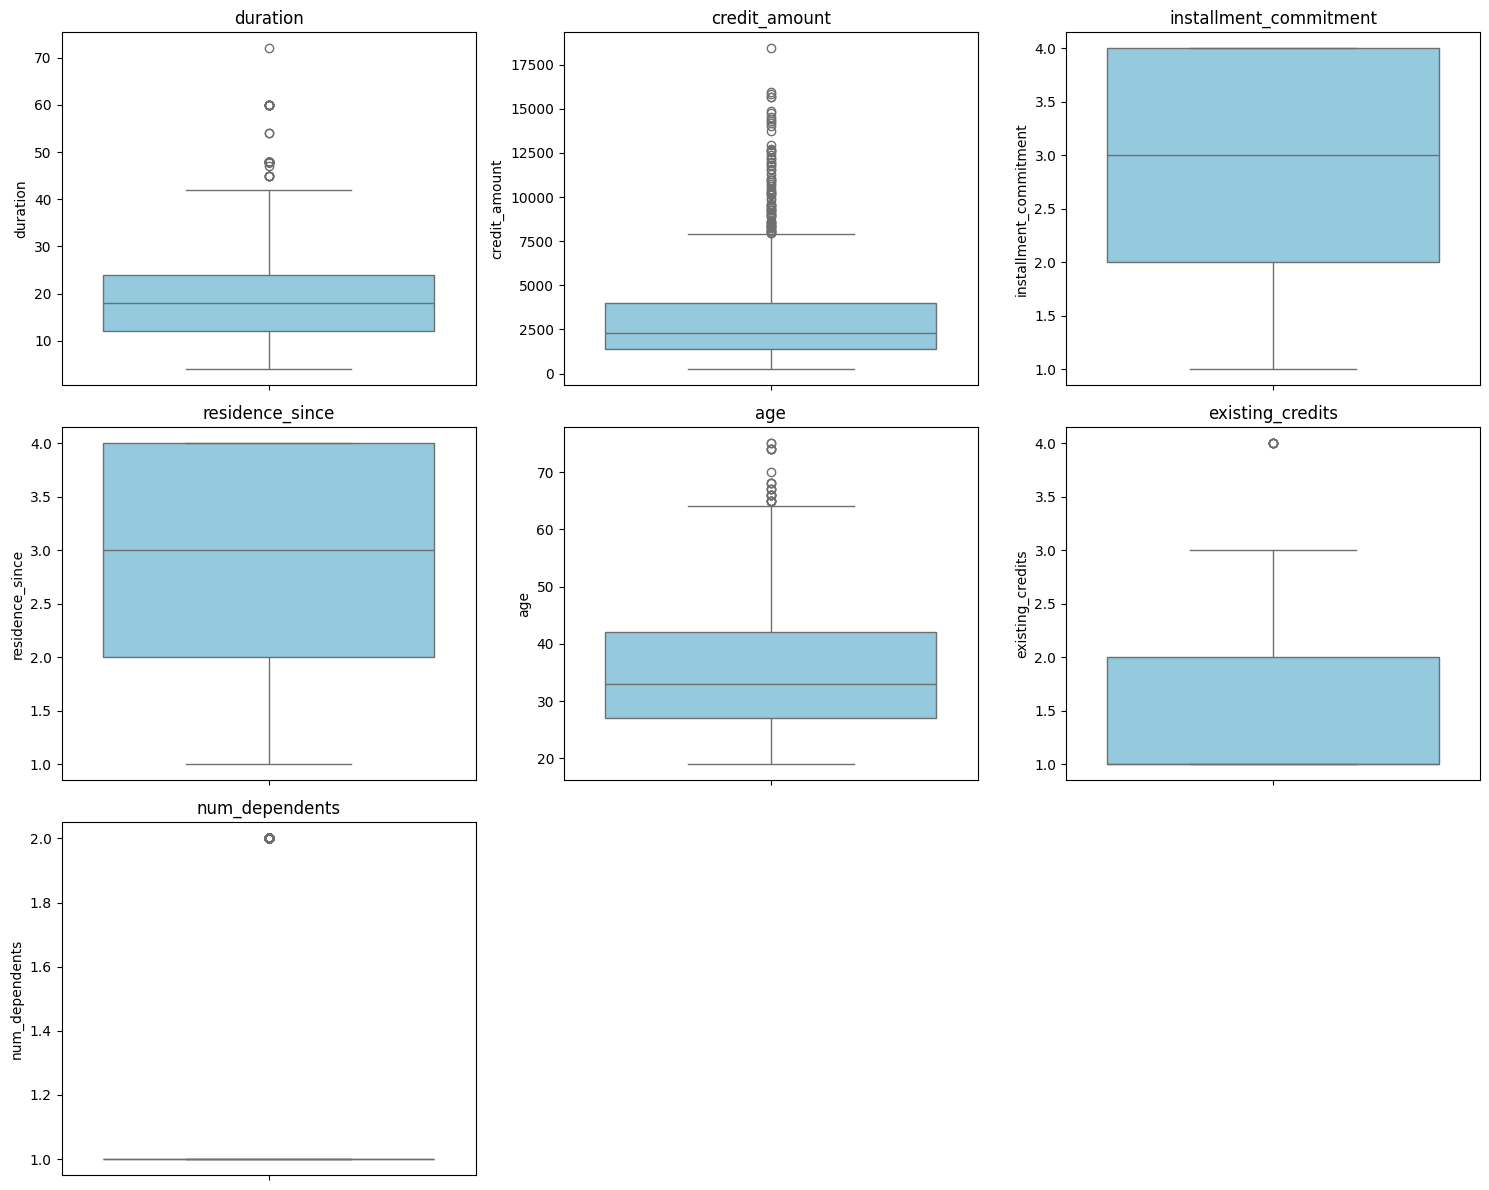

In [11]:
numeric_cols = df.select_dtypes(include=['number']).columns

# Determine rows and columns based on number of features
n_cols = 3
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols  # Round up

# Create the figure
plt.figure(figsize=(n_cols * 5, n_rows * 4))

# Loop through each column and plot
for idx, col in enumerate(numeric_cols, start=1):
    plt.subplot(n_rows, n_cols, idx)
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(col, fontsize=12)
    plt.tight_layout()

plt.show()

In [12]:
def cap_outliers(df):
    df = df.copy()
    for col in df.select_dtypes(include='number').columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df[col] = np.where(df[col] < lower, lower,
                  np.where(df[col] > upper, upper, df[col]))
    return df
df=cap_outliers(df)

<Axes: >

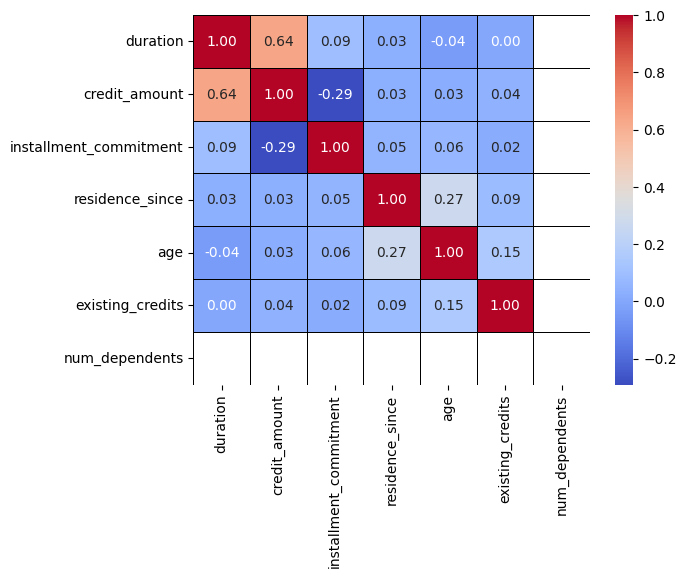

In [13]:
sns.heatmap(df.select_dtypes(include=np.number).corr(),annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, linecolor='black')

In [14]:
for i in df.columns:
  if df[i].dtype in ['float64', 'int64']:
    df[i]=df[i].fillna(df[i].mean())
  else:
    df[i]=df[i].fillna(df[i].mode()[0])

In [15]:
df.isnull().sum()

,0
checking_status,0
duration,0
credit_history,0
purpose,0
credit_amount,0
savings_status,0
employment,0
installment_commitment,0
personal_status,0
other_parties,0


In [16]:
x=df.drop(columns=['class'])
y=df['class']

In [17]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np

# Separate features and target
x = df.drop(columns=['class'])
y = df['class']

# Identify categorical and numerical columns
categorical_cols = x.select_dtypes(include=['object']).columns
numerical_cols = x.select_dtypes(include=np.number).columns

# Create a column transformer for one-hot encoding and scaling
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough' # Keep other columns (if any)
)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

# Apply preprocessing
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)


# Train the logistic regression model
logistic_model = LogisticRegression(random_state=42, solver='liblinear')
logistic_model.fit(X_train_processed, y_train)

# Make predictions and evaluate the model
y_pred_lr = logistic_model.predict(X_test_processed)
print(f"الدقة (Accuracy): {accuracy_score(y_test, y_pred_lr):.4f}")

الدقة (Accuracy): 0.7050


In [18]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

svm_model = SVC(kernel='rbf', random_state=42)

svm_model.fit(X_train_processed, y_train)

y_pred_svm = svm_model.predict(X_test_processed)

print(f"الدقة (Accuracy): {accuracy_score(y_test, y_pred_svm):.4f}")
print(classification_report(y_test, y_pred_svm))
print(confusion_matrix(y_test, y_pred_svm))

الدقة (Accuracy): 0.7400
              precision    recall  f1-score   support

         bad       0.61      0.37      0.46        60
        good       0.77      0.90      0.83       140

    accuracy                           0.74       200
   macro avg       0.69      0.63      0.64       200
weighted avg       0.72      0.74      0.72       200

[[ 22  38]
 [ 14 126]]


In [19]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

print(Counter(y_train))

# Apply preprocessing to X_train
X_train_processed = preprocessor.transform(X_train)

smote = SMOTE(random_state=42)
X_res_smote, y_res_smote = smote.fit_resample(X_train_processed, y_train)
print(Counter(y_res_smote))

model_smote = LogisticRegression(random_state=42)
model_smote.fit(X_res_smote, y_res_smote)

# Apply preprocessing to X_test before prediction
X_test_processed = preprocessor.transform(X_test)
y_pred_smote = model_smote.predict(X_test_processed)

print("SMOTE:")
print(classification_report(y_test, y_pred_smote, digits=4))

#smote_enn = SMOTEENN(random_state=42)
#X_train, y_train  = smote_enn.fit_resample(X_train, y_train)

Counter({'good': 560, 'bad': 240})
Counter({'good': 560, 'bad': 560})
SMOTE:
              precision    recall  f1-score   support

         bad     0.4535    0.6500    0.5342        60
        good     0.8158    0.6643    0.7323       140

    accuracy                         0.6600       200
   macro avg     0.6346    0.6571    0.6333       200
weighted avg     0.7071    0.6600    0.6729       200



In [20]:
from sklearn.preprocessing import MinMaxScaler  # 0 - 1

scaler = MinMaxScaler()

X_train_scaled_minmax = scaler.fit_transform(X_train_processed)

X_test_scaled_minmax = scaler.transform(X_test_processed)

In [21]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression   #only for classification


# instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state=0)


# fit the model
logreg.fit(X_train_processed, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [22]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_lr)))

Model accuracy score: 0.7050


In [23]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_lr)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[ 27  33]
 [ 26 114]]

True Positives(TP) =  27

True Negatives(TN) =  114

False Positives(FP) =  33

False Negatives(FN) =  26


In [31]:
from sklearn.preprocessing import LabelEncoder

for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [38]:
df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,1,6.0,1,6,1169.0,4,3,4.0,3,2,...,3,64.5,1,1,2.0,1,1.0,1,1,1
1,0,42.0,3,6,5951.0,2,0,2.0,0,2,...,3,22.0,1,1,1.0,1,1.0,0,1,0
2,3,12.0,1,2,2096.0,2,1,2.0,3,2,...,3,49.0,1,1,1.0,3,1.0,0,1,1
3,1,42.0,3,3,7882.0,2,1,2.0,3,1,...,1,45.0,1,0,1.0,1,1.0,0,1,1
4,1,24.0,2,4,4870.0,2,0,3.0,3,2,...,2,53.0,1,0,2.0,1,1.0,0,1,0


In [27]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from imblearn.combine import SMOTEENN
from collections import Counter

#عدد كل كلاس على حده علشان اشوف عدم التوازن
print(Counter(y_train))

# Apply preprocessing to X_train
X_train_processed = preprocessor.transform(X_train)

#SMOTE بيخترع بيانات جديدة للفئة القليلة بطريقة ذكية (مش نسخ، لكنه يولد أمثلة قريبة من اللي موجودة).
smote = SMOTE(random_state=42)
X_res_smote, y_res_smote = smote.fit_resample(X_train_processed, y_train)

#بشوف بعد الاسموت التوازن
print(Counter(y_res_smote))

model_smote = LogisticRegression(random_state=42)
model_smote.fit(X_res_smote, y_res_smote)

# Apply preprocessing to X_test before prediction
X_test_processed = preprocessor.transform(X_test)
y_pred_smote = model_smote.predict(X_test_processed)

print("SMOTE:")
print(classification_report(y_test, y_pred_smote, digits=4))

#smote_enn = SMOTEENN(random_state=42)
#X_train, y_train  = smote_enn.fit_resample(X_train, y_train)

Counter({'good': 560, 'bad': 240})
Counter({'good': 560, 'bad': 560})
SMOTE:
              precision    recall  f1-score   support

         bad     0.4535    0.6500    0.5342        60
        good     0.8158    0.6643    0.7323       140

    accuracy                         0.6600       200
   macro avg     0.6346    0.6571    0.6333       200
weighted avg     0.7071    0.6600    0.6729       200



In [35]:
smote_enn = SMOTEENN(random_state=42)
X_train_processed = preprocessor.transform(X_train)
X_resampled, y_resampled = smote_enn.fit_resample(X_train_processed, y_train)

# Display resampled class distribution
print(f"Resampled class distribution: {Counter(y_resampled)}")

# Training a logistic regression model on the resampled dataset
model = LogisticRegression(random_state=42)
model.fit(X_resampled, y_resampled)
y_pred = model.predict(X_test_processed)

# Evaluating the model
print("SMOTEENN Results:")
print(classification_report(y_test, y_pred))

Resampled class distribution: Counter({'bad': 435, 'good': 209})
SMOTEENN Results:
              precision    recall  f1-score   support

         bad       0.45      0.80      0.58        60
        good       0.87      0.59      0.70       140

    accuracy                           0.65       200
   macro avg       0.66      0.69      0.64       200
weighted avg       0.75      0.65      0.66       200



In [37]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from collections import Counter

ros = RandomOverSampler(random_state=42)

# Apply preprocessing to X_train before resampling
X_train_processed = preprocessor.transform(X_train)
X_res_ros, y_res_ros = ros.fit_resample(X_train_processed, y_train)

print(Counter(y_res_ros))

model_ros = LogisticRegression(random_state=42)
model_ros.fit(X_res_ros, y_res_ros)

# Apply preprocessing to X_test before prediction
X_test_processed = preprocessor.transform(X_test)
y_pred_ros = model_ros.predict(X_test_processed)

print("Random Oversampling:")
print(classification_report(y_test, y_pred_ros))

Counter({'good': 560, 'bad': 560})
Random Oversampling:
              precision    recall  f1-score   support

         bad       0.51      0.70      0.59        60
        good       0.85      0.71      0.77       140

    accuracy                           0.70       200
   macro avg       0.68      0.70      0.68       200
weighted avg       0.74      0.70      0.72       200



In [39]:
df.isnull().sum()

,0
checking_status,0
duration,0
credit_history,0
purpose,0
credit_amount,0
savings_status,0
employment,0
installment_commitment,0
personal_status,0
other_parties,0


In [40]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
checking_status,1000.0,1.7220,1.259485,0.0,1.0,2.0,3.00,3.000
duration,1000.0,20.3070,10.615151,4.0,12.0,18.0,24.00,42.000
credit_history,1000.0,2.2520,1.056225,0.0,1.0,3.0,3.00,4.000
purpose,1000.0,4.5510,2.387278,0.0,3.0,4.0,6.00,9.000
credit_amount,1000.0,3051.1010,2187.140403,250.0,1365.5,2319.5,3972.25,7882.375
savings_status,1000.0,2.1460,1.110819,0.0,2.0,2.0,2.00,4.000
employment,1000.0,1.4940,1.346022,0.0,0.0,1.0,3.00,4.000
installment_commitment,1000.0,2.9730,1.118715,1.0,2.0,3.0,4.00,4.000
personal_status,1000.0,1.8780,1.350904,0.0,0.0,3.0,3.00,3.000
other_parties,1000.0,1.8660,0.445244,0.0,2.0,2.0,2.00,2.000


In [41]:
x = df.drop(columns=['class'])
y = df['class']

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [43]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import numpy as np

# Identify categorical and numerical columns
categorical_cols = x.select_dtypes(include=['object']).columns
numerical_cols = x.select_dtypes(include=np.number).columns

# Create a column transformer for one-hot encoding and scaling
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough' # Keep other columns (if any)
)

# Apply preprocessing
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [44]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression   #only for classification


# instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state=0)


# fit the model
logreg.fit(X_train_processed, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [45]:
from sklearn.metrics import accuracy_score

y_pred_lr = logreg.predict(X_test_processed)
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_lr)))

Model accuracy score: 0.7050


In [46]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_lr)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[ 20  40]
 [ 19 121]]

True Positives(TP) =  20

True Negatives(TN) =  121

False Positives(FP) =  40

False Negatives(FN) =  19


In [47]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.51      0.33      0.40        60
           1       0.75      0.86      0.80       140

    accuracy                           0.70       200
   macro avg       0.63      0.60      0.60       200
weighted avg       0.68      0.70      0.68       200



In [48]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from collections import Counter

# Re-apply preprocessing to X_train
X_train_processed = preprocessor.transform(X_train)

# Apply Random Oversampling
ros = RandomOverSampler(random_state=42)
X_res_ros, y_res_ros = ros.fit_resample(X_train_processed, y_train)

print("Class distribution after Random Oversampling:", Counter(y_res_ros))

# Train a Logistic Regression model on the oversampled data
model_ros = LogisticRegression(random_state=42)
model_ros.fit(X_res_ros, y_res_ros)

# Apply preprocessing to X_test before prediction
X_test_processed = preprocessor.transform(X_test)

# Make predictions and evaluate the model
y_pred_ros = model_ros.predict(X_test_processed)

print("\nClassification Report after Random Oversampling:")
print(classification_report(y_test, y_pred_ros))

Class distribution after Random Oversampling: Counter({1: 560, 0: 560})

Classification Report after Random Oversampling:
              precision    recall  f1-score   support

           0       0.47      0.70      0.56        60
           1       0.84      0.66      0.74       140

    accuracy                           0.67       200
   macro avg       0.65      0.68      0.65       200
weighted avg       0.73      0.67      0.68       200



In [49]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from collections import Counter

# Apply SMOTE oversampling
smote = SMOTE(random_state=42)

# Apply preprocessing to X_train before resampling
X_train_processed = preprocessor.transform(X_train)
X_res_smote, y_res_smote = smote.fit_resample(X_train_processed, y_train)

print("Class distribution after SMOTE:", Counter(y_res_smote))

# Train a Logistic Regression model on the SMOTE-resampled data
model_smote = LogisticRegression(random_state=42)
model_smote.fit(X_res_smote, y_res_smote)

# Apply preprocessing to X_test before prediction
X_test_processed = preprocessor.transform(X_test)

# Make predictions and evaluate the model
y_pred_smote = model_smote.predict(X_test_processed)

print("\nClassification Report after SMOTE:")
print(classification_report(y_test, y_pred_smote))

Class distribution after SMOTE: Counter({1: 560, 0: 560})

Classification Report after SMOTE:
              precision    recall  f1-score   support

           0       0.47      0.72      0.57        60
           1       0.84      0.65      0.73       140

    accuracy                           0.67       200
   macro avg       0.65      0.68      0.65       200
weighted avg       0.73      0.67      0.68       200



In [50]:
from imblearn.combine import SMOTEENN
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from collections import Counter

# Apply SMOTEENN resampling
smote_enn = SMOTEENN(random_state=42)

# Apply preprocessing to X_train before resampling
X_train_processed = preprocessor.transform(X_train)
X_res_smote_enn, y_res_smote_enn = smote_enn.fit_resample(X_train_processed, y_train)

print("Class distribution after SMOTEENN:", Counter(y_res_smote_enn))

# Train a Logistic Regression model on the SMOTEENN-resampled data
model_smote_enn = LogisticRegression(random_state=42)
model_smote_enn.fit(X_res_smote_enn, y_res_smote_enn)

# Apply preprocessing to X_test before prediction
X_test_processed = preprocessor.transform(X_test)

# Make predictions and evaluate the model
y_pred_smote_enn = model_smote_enn.predict(X_test_processed)

print("\nClassification Report after SMOTEENN:")
print(classification_report(y_test, y_pred_smote_enn))

Class distribution after SMOTEENN: Counter({0: 409, 1: 204})

Classification Report after SMOTEENN:
              precision    recall  f1-score   support

           0       0.38      0.83      0.53        60
           1       0.86      0.43      0.57       140

    accuracy                           0.55       200
   macro avg       0.62      0.63      0.55       200
weighted avg       0.72      0.55      0.56       200



In [51]:
import pandas as pd

# Get classification reports as dictionaries
report_original = classification_report(y_test, y_pred_lr, output_dict=True)
report_ros = classification_report(y_test, y_pred_ros, output_dict=True)
report_smote = classification_report(y_test, y_pred_smote, output_dict=True)
report_smote_enn = classification_report(y_test, y_pred_smote_enn, output_dict=True)

# Create a dictionary to hold the reports
reports = {
    'Original': report_original['weighted avg'],
    'Random Oversampling': report_ros['weighted avg'],
    'SMOTE': report_smote['weighted avg'],
    'SMOTEENN': report_smote_enn['weighted avg']
}

# Convert the dictionary to a pandas DataFrame
reports_df = pd.DataFrame(reports).T

# Display the DataFrame
display(reports_df)

,precision,recall,f1-score,support
Original,0.679933,0.705,0.684003,200.0
Random Oversampling,0.725455,0.670,0.683200,200.0
SMOTE,0.730032,0.670,0.683447,200.0
SMOTEENN,0.715385,0.550,0.557895,200.0


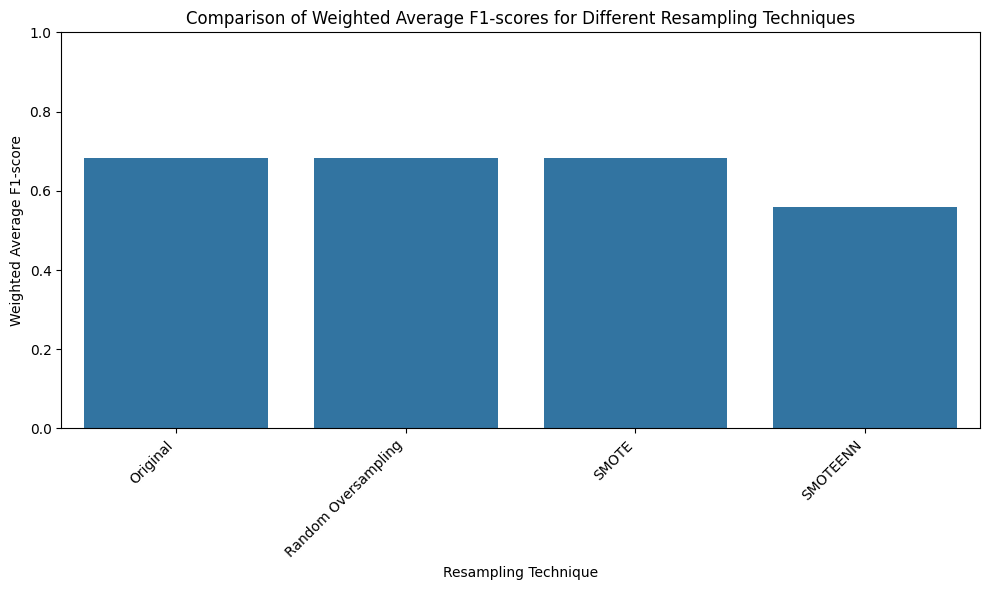

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar plot comparing the weighted average F1-scores
plt.figure(figsize=(10, 6))
sns.barplot(x=reports_df.index, y=reports_df['f1-score'])
plt.title('Comparison of Weighted Average F1-scores for Different Resampling Techniques')
plt.xlabel('Resampling Technique')
plt.ylabel('Weighted Average F1-score')
plt.ylim(0, 1)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [53]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Train the SVM model on the original data
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train_processed, y_train)

# Make predictions and evaluate the model
y_pred_svm = svm_model.predict(X_test_processed)

print(f"Accuracy: {accuracy_score(y_test, y_pred_svm):.4f}")
print(classification_report(y_test, y_pred_svm))
print(confusion_matrix(y_test, y_pred_svm))

Accuracy: 0.7250
              precision    recall  f1-score   support

           0       0.59      0.27      0.37        60
           1       0.75      0.92      0.82       140

    accuracy                           0.72       200
   macro avg       0.67      0.59      0.60       200
weighted avg       0.70      0.72      0.69       200

[[ 16  44]
 [ 11 129]]


In [54]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from collections import Counter

# Apply Random Oversampling
ros = RandomOverSampler(random_state=42)

# Apply preprocessing to X_train before resampling
X_train_processed = preprocessor.transform(X_train)
X_res_ros, y_res_ros = ros.fit_resample(X_train_processed, y_train)

print("Class distribution after Random Oversampling:", Counter(y_res_ros))

# Train a SVM model on the oversampled data
svm_model_ros = SVC(kernel='rbf', random_state=42)
svm_model_ros.fit(X_res_ros, y_res_ros)

# Apply preprocessing to X_test before prediction
X_test_processed = preprocessor.transform(X_test)

# Make predictions and evaluate the model
y_pred_svm_ros = svm_model_ros.predict(X_test_processed)

print("\nClassification Report for SVM after Random Oversampling:")
print(classification_report(y_test, y_pred_svm_ros))
print(confusion_matrix(y_test, y_pred_svm_ros))

Class distribution after Random Oversampling: Counter({1: 560, 0: 560})

Classification Report for SVM after Random Oversampling:
              precision    recall  f1-score   support

           0       0.46      0.58      0.51        60
           1       0.80      0.71      0.75       140

    accuracy                           0.67       200
   macro avg       0.63      0.65      0.63       200
weighted avg       0.70      0.67      0.68       200

[[35 25]
 [41 99]]


In [55]:
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from collections import Counter

# Apply SMOTE oversampling
smote = SMOTE(random_state=42)

# Apply preprocessing to X_train before resampling
X_train_processed = preprocessor.transform(X_train)
X_res_smote, y_res_smote = smote.fit_resample(X_train_processed, y_train)

print("Class distribution after SMOTE:", Counter(y_res_smote))

# Train a SVM model on the SMOTE-resampled data
svm_model_smote = SVC(kernel='rbf', random_state=42)
svm_model_smote.fit(X_res_smote, y_res_smote)

# Apply preprocessing to X_test before prediction
X_test_processed = preprocessor.transform(X_test)

# Make predictions and evaluate the model
y_pred_svm_smote = svm_model_smote.predict(X_test_processed)

print("\nClassification Report for SVM after SMOTE:")
print(classification_report(y_test, y_pred_svm_smote))
print(confusion_matrix(y_test, y_pred_svm_smote))

Class distribution after SMOTE: Counter({1: 560, 0: 560})

Classification Report for SVM after SMOTE:
              precision    recall  f1-score   support

           0       0.45      0.52      0.48        60
           1       0.78      0.73      0.75       140

    accuracy                           0.67       200
   macro avg       0.61      0.62      0.62       200
weighted avg       0.68      0.67      0.67       200

[[ 31  29]
 [ 38 102]]


In [56]:
from imblearn.combine import SMOTEENN
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from collections import Counter

# Apply SMOTEENN resampling
smote_enn = SMOTEENN(random_state=42)

# Apply preprocessing to X_train before resampling
X_train_processed = preprocessor.transform(X_train)
X_res_smote_enn, y_res_smote_enn = smote_enn.fit_resample(X_train_processed, y_train)

print("Class distribution after SMOTEENN:", Counter(y_res_smote_enn))

# Train a SVM model on the SMOTEENN-resampled data
svm_model_smote_enn = SVC(kernel='rbf', random_state=42)
svm_model_smote_enn.fit(X_res_smote_enn, y_res_smote_enn)

# Apply preprocessing to X_test before prediction
X_test_processed = preprocessor.transform(X_test)

# Make predictions and evaluate the model
y_pred_svm_smote_enn = svm_model_smote_enn.predict(X_test_processed)

print("\nClassification Report for SVM after SMOTEENN:")
print(classification_report(y_test, y_pred_svm_smote_enn))
print(confusion_matrix(y_test, y_pred_svm_smote_enn))

Class distribution after SMOTEENN: Counter({0: 409, 1: 204})

Classification Report for SVM after SMOTEENN:
              precision    recall  f1-score   support

           0       0.41      0.80      0.54        60
           1       0.86      0.51      0.64       140

    accuracy                           0.59       200
   macro avg       0.63      0.65      0.59       200
weighted avg       0.72      0.59      0.61       200

[[48 12]
 [69 71]]


In [57]:
import pandas as pd

# Get classification reports as dictionaries for SVM models
report_svm_original = classification_report(y_test, y_pred_svm, output_dict=True)
report_svm_ros = classification_report(y_test, y_pred_svm_ros, output_dict=True)
report_svm_smote = classification_report(y_test, y_pred_svm_smote, output_dict=True)
report_svm_smote_enn = classification_report(y_test, y_pred_svm_smote_enn, output_dict=True)

# Create a dictionary to hold the SVM reports
svm_reports = {
    'SVM - Original': report_svm_original['weighted avg'],
    'SVM - Random Oversampling': report_svm_ros['weighted avg'],
    'SVM - SMOTE': report_svm_smote['weighted avg'],
    'SVM - SMOTEENN': report_svm_smote_enn['weighted avg']
}

# Convert the dictionary to a pandas DataFrame
svm_reports_df = pd.DataFrame(svm_reports).T

# Display the DataFrame
display(svm_reports_df)

,precision,recall,f1-score,support
SVM - Original,0.699743,0.725,0.687342,200.0
SVM - Random Oversampling,0.697029,0.670,0.679412,200.0
SVM - SMOTE,0.679821,0.665,0.671123,200.0
SVM - SMOTEENN,0.721872,0.595,0.608452,200.0


# Task
Apply all suitable classification models to the dataset and evaluate their performance, including the impact of resampling techniques on handling class imbalance.

## Identify classification models

### Subtask:
Determine a selection of suitable classification models to evaluate.


**Reasoning**:
List suitable classification models and their justifications based on the problem and data characteristics.



In [58]:
# Based on the nature of the problem (binary classification) and the dataset characteristics (mixed numerical and categorical features),
# here is a selection of suitable classification models to evaluate:

print("Selected Classification Models and Justifications:")

# 1. Logistic Regression
print("\n1. Logistic Regression:")
print("- Justification: Logistic Regression is a simple yet effective linear model for binary classification. It models the probability that an instance belongs to a particular class. It can handle both numerical and categorical features after appropriate preprocessing (scaling and one-hot encoding). It's a good baseline model to understand the linear separability of the data.")

# 2. Support Vector Machines (SVM)
print("\n2. Support Vector Machines (SVM):")
print("- Justification: SVM is a powerful model that finds an optimal hyperplane to separate classes in a high-dimensional space. The 'rbf' kernel can capture non-linear relationships. It works well with scaled numerical data and one-hot encoded categorical features. SVM is known for its effectiveness in various classification tasks.")

# 3. Random Forest
print("\n3. Random Forest:")
print("- Justification: Random Forest is an ensemble method that builds multiple decision trees and combines their predictions. It can handle both numerical and categorical features without extensive preprocessing (though scaling numerical features is generally recommended). It is robust to outliers and can capture complex non-linear relationships and feature interactions. It also provides feature importance, which can be useful for understanding the data.")

# 4. Gradient Boosting (e.g., LightGBM or XGBoost)
print("\n4. Gradient Boosting (e.g., LightGBM or XGBoost):")
print("- Justification: Gradient Boosting models are powerful ensemble methods that sequentially build trees, with each new tree correcting the errors of the previous ones. They often achieve state-of-the-art performance on structured data. They can handle mixed data types and are less sensitive to feature scaling than models like SVM. They are effective at capturing complex patterns and interactions.")

Selected Classification Models and Justifications:

1. Logistic Regression:
- Justification: Logistic Regression is a simple yet effective linear model for binary classification. It models the probability that an instance belongs to a particular class. It can handle both numerical and categorical features after appropriate preprocessing (scaling and one-hot encoding). It's a good baseline model to understand the linear separability of the data.

2. Support Vector Machines (SVM):
- Justification: SVM is a powerful model that finds an optimal hyperplane to separate classes in a high-dimensional space. The 'rbf' kernel can capture non-linear relationships. It works well with scaled numerical data and one-hot encoded categorical features. SVM is known for its effectiveness in various classification tasks.

3. Random Forest:
- Justification: Random Forest is an ensemble method that builds multiple decision trees and combines their predictions. It can handle both numerical and categorical fe

## Train and evaluate models (original data)

### Subtask:
Train each selected model on the original, imbalanced data and evaluate their performance using appropriate metrics (e.g., accuracy, precision, recall, F1-score, confusion matrix).


**Reasoning**:
Train and evaluate the Logistic Regression model on the original data.



In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Train the logistic regression model on the original data
logreg = LogisticRegression(solver='liblinear', random_state=0)
logreg.fit(X_train_processed, y_train)

# Evaluate the model
y_pred_lr = logreg.predict(X_test_processed)
print("Logistic Regression - Original Data:")
print(classification_report(y_test, y_pred_lr))

Logistic Regression - Original Data:
              precision    recall  f1-score   support

           0       0.51      0.33      0.40        60
           1       0.75      0.86      0.80       140

    accuracy                           0.70       200
   macro avg       0.63      0.60      0.60       200
weighted avg       0.68      0.70      0.68       200



**Reasoning**:
Train and evaluate the SVM model on the original data.



In [60]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Train the SVM model (using the RBF kernel) on the original data
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train_processed, y_train)

# Evaluate the model
y_pred_svm = svm_model.predict(X_test_processed)
print("SVM - Original Data:")
print(classification_report(y_test, y_pred_svm))

SVM - Original Data:
              precision    recall  f1-score   support

           0       0.59      0.27      0.37        60
           1       0.75      0.92      0.82       140

    accuracy                           0.72       200
   macro avg       0.67      0.59      0.60       200
weighted avg       0.70      0.72      0.69       200



**Reasoning**:
Train and evaluate the Random Forest model on the original data.



In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Train a Random Forest classifier on the original data
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_processed, y_train)

# Evaluate the model
y_pred_rf = rf_model.predict(X_test_processed)
print("Random Forest - Original Data:")
print(classification_report(y_test, y_pred_rf))

Random Forest - Original Data:
              precision    recall  f1-score   support

           0       0.66      0.38      0.48        60
           1       0.78      0.91      0.84       140

    accuracy                           0.76       200
   macro avg       0.72      0.65      0.66       200
weighted avg       0.74      0.76      0.73       200



**Reasoning**:
Train and evaluate the LightGBM model on the original data.



In [62]:
import lightgbm as lgb
from sklearn.metrics import classification_report

# Train a LightGBM classifier on the original data
lgbm_model = lgb.LGBMClassifier(random_state=42, objective='binary')
lgbm_model.fit(X_train_processed, y_train)

# Evaluate the model
y_pred_lgbm = lgbm_model.predict(X_test_processed)
print("LightGBM - Original Data:")
print(classification_report(y_test, y_pred_lgbm))

[LightGBM] [Info] Number of positive: 560, number of negative: 240
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000463 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 404
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.700000 -> initscore=0.847298
[LightGBM] [Info] Start training from score 0.847298
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


## Train and evaluate models (with resampling)

### Subtask:
For promising models, train and evaluate them on data resampled using techniques like Random Oversampling, SMOTE, and SMOTEENN to see how they handle the class imbalance.


**Reasoning**:
Based on the previous step, Random Forest and LightGBM showed promising performance on the original data. Now, train and evaluate these two models using Random Oversampling on the training data to address class imbalance.



In [63]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
from sklearn.metrics import classification_report
from collections import Counter

# Apply Random Oversampling to the training data
ros = RandomOverSampler(random_state=42)
X_res_ros, y_res_ros = ros.fit_resample(X_train_processed, y_train)

print("Class distribution after Random Oversampling:", Counter(y_res_ros))

# Train Random Forest on Random Oversampled data
rf_model_ros = RandomForestClassifier(random_state=42)
rf_model_ros.fit(X_res_ros, y_res_ros)

# Evaluate Random Forest on the original test data
y_pred_rf_ros = rf_model_ros.predict(X_test_processed)
print("\nRandom Forest - Random Oversampling:")
print(classification_report(y_test, y_pred_rf_ros))

# Train LightGBM on Random Oversampled data
lgbm_model_ros = lgb.LGBMClassifier(random_state=42, objective='binary')
lgbm_model_ros.fit(X_res_ros, y_res_ros)

# Evaluate LightGBM on the original test data
y_pred_lgbm_ros = lgbm_model_ros.predict(X_test_processed)
print("\nLightGBM - Random Oversampling:")
print(classification_report(y_test, y_pred_lgbm_ros))

Class distribution after Random Oversampling: Counter({1: 560, 0: 560})

Random Forest - Random Oversampling:
              precision    recall  f1-score   support

           0       0.57      0.47      0.51        60
           1       0.79      0.85      0.82       140

    accuracy                           0.73       200
   macro avg       0.68      0.66      0.67       200
weighted avg       0.72      0.73      0.73       200

[LightGBM] [Info] Number of positive: 560, number of negative: 560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000190 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 404
[LightGBM] [Info] Number of data points in the train set: 1120, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000

LightGBM - Random Oversampling:
              precision    recall

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


**Reasoning**:
Train and evaluate the promising models (Random Forest and LightGBM) using SMOTE on the training data to handle class imbalance.



In [64]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
from sklearn.metrics import classification_report
from collections import Counter

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_res_smote, y_res_smote = smote.fit_resample(X_train_processed, y_train)

print("Class distribution after SMOTE:", Counter(y_res_smote))

# Train Random Forest on SMOTE resampled data
rf_model_smote = RandomForestClassifier(random_state=42)
rf_model_smote.fit(X_res_smote, y_res_smote)

# Evaluate Random Forest on the original test data
y_pred_rf_smote = rf_model_smote.predict(X_test_processed)
print("\nRandom Forest - SMOTE:")
print(classification_report(y_test, y_pred_rf_smote))

# Train LightGBM on SMOTE resampled data
lgbm_model_smote = lgb.LGBMClassifier(random_state=42, objective='binary')
lgbm_model_smote.fit(X_res_smote, y_res_smote)

# Evaluate LightGBM on the original test data
y_pred_lgbm_smote = lgbm_model_smote.predict(X_test_processed)
print("\nLightGBM - SMOTE:")
print(classification_report(y_test, y_pred_lgbm_smote))

Class distribution after SMOTE: Counter({1: 560, 0: 560})

Random Forest - SMOTE:
              precision    recall  f1-score   support

           0       0.48      0.38      0.43        60
           1       0.76      0.82      0.79       140

    accuracy                           0.69       200
   macro avg       0.62      0.60      0.61       200
weighted avg       0.67      0.69      0.68       200

[LightGBM] [Info] Number of positive: 560, number of negative: 560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000173 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1338
[LightGBM] [Info] Number of data points in the train set: 1120, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000

LightGBM - SMOTE:
              precision    recall  f1-score   support

           0       

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


**Reasoning**:
Train and evaluate the promising models (Random Forest and LightGBM) using SMOTEENN on the training data to handle class imbalance.



In [65]:
from imblearn.combine import SMOTEENN
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
from sklearn.metrics import classification_report
from collections import Counter

# Apply SMOTEENN to the training data
smote_enn = SMOTEENN(random_state=42)
X_res_smote_enn, y_res_smote_enn = smote_enn.fit_resample(X_train_processed, y_train)

print("Class distribution after SMOTEENN:", Counter(y_res_smote_enn))

# Train Random Forest on SMOTEENN resampled data
rf_model_smote_enn = RandomForestClassifier(random_state=42)
rf_model_smote_enn.fit(X_res_smote_enn, y_res_smote_enn)

# Evaluate Random Forest on the original test data
y_pred_rf_smote_enn = rf_model_smote_enn.predict(X_test_processed)
print("\nRandom Forest - SMOTEENN:")
print(classification_report(y_test, y_pred_rf_smote_enn))

# Train LightGBM on SMOTEENN resampled data
lgbm_model_smote_enn = lgb.LGBMClassifier(random_state=42, objective='binary')
lgbm_model_smote_enn.fit(X_res_smote_enn, y_res_smote_enn)

# Evaluate LightGBM on the original test data
y_pred_lgbm_smote_enn = lgbm_model_smote_enn.predict(X_test_processed)
print("\nLightGBM - SMOTEENN:")
print(classification_report(y_test, y_pred_lgbm_smote_enn))

Class distribution after SMOTEENN: Counter({0: 409, 1: 204})

Random Forest - SMOTEENN:
              precision    recall  f1-score   support

           0       0.45      0.83      0.58        60
           1       0.89      0.56      0.68       140

    accuracy                           0.64       200
   macro avg       0.67      0.70      0.63       200
weighted avg       0.75      0.64      0.65       200

[LightGBM] [Info] Number of positive: 204, number of negative: 409
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000175 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 994
[LightGBM] [Info] Number of data points in the train set: 613, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.332790 -> initscore=-0.695595
[LightGBM] [Info] Start training from score -0.695595
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


## Compare model performance

### Subtask:
Summarize and compare the performance of all evaluated models across different resampling techniques using tables and visualizations.


**Reasoning**:
Create dataframes to store the performance metrics for each model and resampling technique, then display the dataframes and generate visualizations to compare the weighted average F1-scores and macro average F1-scores.



Weighted Average Metrics:


,precision,recall,f1-score,support
Logistic Regression - Original,0.679933,0.705,0.684003,200.0
Logistic Regression - ROS,0.725455,0.670,0.683200,200.0
Logistic Regression - SMOTE,0.730032,0.670,0.683447,200.0
Logistic Regression - SMOTEENN,0.715385,0.550,0.557895,200.0
SVM - Original,0.699743,0.725,0.687342,200.0
SVM - ROS,0.697029,0.670,0.679412,200.0
SVM - SMOTE,0.679821,0.665,0.671123,200.0
SVM - SMOTEENN,0.721872,0.595,0.608452,200.0
Random Forest - Original,0.740173,0.755,0.732804,200.0
Random Forest - ROS,0.723084,0.735,0.726637,200.0



Macro Average Metrics:


,precision,recall,f1-score,support
Logistic Regression - Original,0.632187,0.598810,0.604014,200.0
Logistic Regression - ROS,0.651515,0.678571,0.648000,200.0
Logistic Regression - SMOTE,0.654992,0.683333,0.649830,200.0
Logistic Regression - SMOTEENN,0.620879,0.630952,0.548872,200.0
SVM - Original,0.669129,0.594048,0.596049,200.0
SVM - ROS,0.629457,0.645238,0.632353,200.0
SVM - SMOTE,0.613951,0.622619,0.616694,200.0
SVM - SMOTEENN,0.632839,0.653571,0.589572,200.0
Random Forest - Original,0.716450,0.648810,0.661777,200.0
Random Forest - ROS,0.679754,0.658333,0.665815,200.0


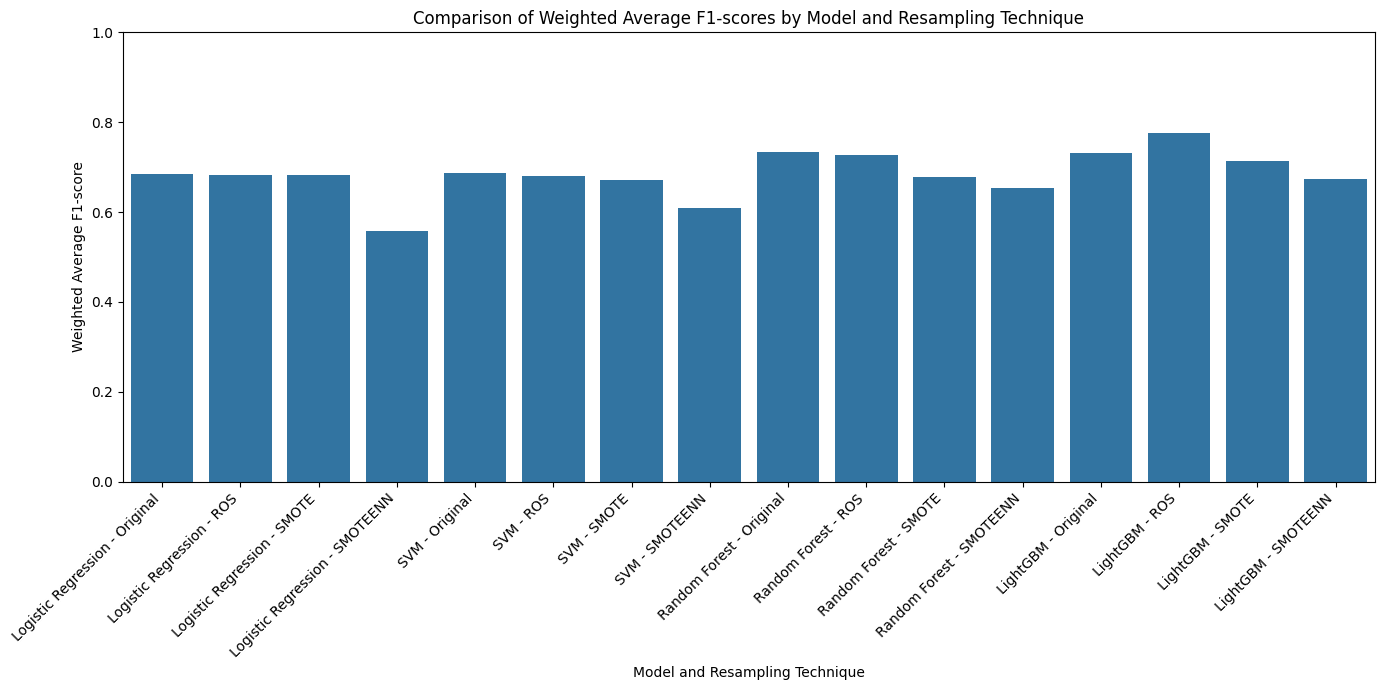

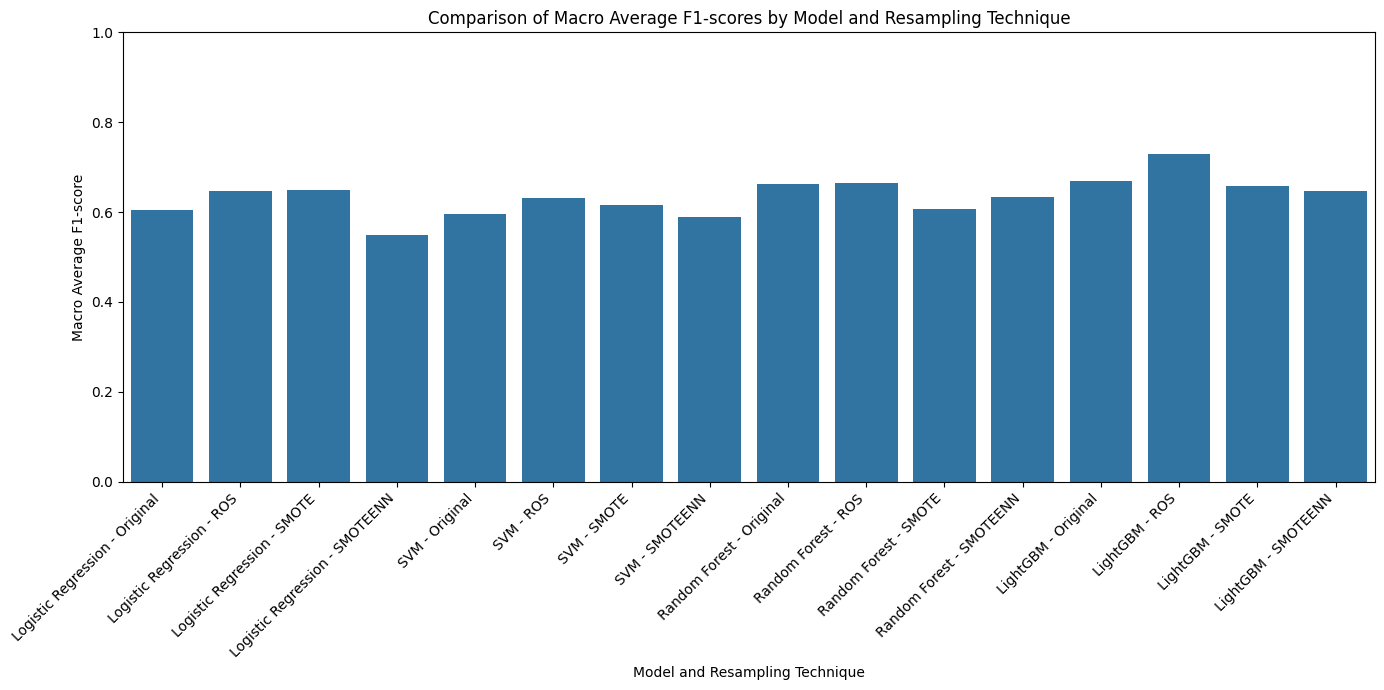

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report

# Get classification reports as dictionaries for each model and resampling technique
report_lr_original = classification_report(y_test, y_pred_lr, output_dict=True)
report_lr_ros = classification_report(y_test, y_pred_ros, output_dict=True)
report_lr_smote = classification_report(y_test, y_pred_smote, output_dict=True)
report_lr_smote_enn = classification_report(y_test, y_pred_smote_enn, output_dict=True)

report_svm_original = classification_report(y_test, y_pred_svm, output_dict=True)
report_svm_ros = classification_report(y_test, y_pred_svm_ros, output_dict=True)
report_svm_smote = classification_report(y_test, y_pred_svm_smote, output_dict=True)
report_svm_smote_enn = classification_report(y_test, y_pred_svm_smote_enn, output_dict=True)

# Assuming you have run the Random Forest and LightGBM models with resampling in previous steps
# and have the prediction variables y_pred_rf_ros, y_pred_rf_smote, y_pred_rf_smote_enn,
# y_pred_lgbm_ros, y_pred_lgbm_smote, y_pred_lgbm_smote_enn

report_rf_original = classification_report(y_test, y_pred_rf, output_dict=True)
report_rf_ros = classification_report(y_test, y_pred_rf_ros, output_dict=True)
report_rf_smote = classification_report(y_test, y_pred_rf_smote, output_dict=True)
report_rf_smote_enn = classification_report(y_test, y_pred_rf_smote_enn, output_dict=True)

report_lgbm_original = classification_report(y_test, y_pred_lgbm, output_dict=True)
report_lgbm_ros = classification_report(y_test, y_pred_lgbm_ros, output_dict=True)
report_lgbm_smote = classification_report(y_test, y_pred_lgbm_smote, output_dict=True)
report_lgbm_smote_enn = classification_report(y_test, y_pred_lgbm_smote_enn, output_dict=True)


# Create dictionaries to hold the weighted average and macro average metrics
weighted_avg_reports = {
    'Logistic Regression - Original': report_lr_original['weighted avg'],
    'Logistic Regression - ROS': report_lr_ros['weighted avg'],
    'Logistic Regression - SMOTE': report_lr_smote['weighted avg'],
    'Logistic Regression - SMOTEENN': report_lr_smote_enn['weighted avg'],
    'SVM - Original': report_svm_original['weighted avg'],
    'SVM - ROS': report_svm_ros['weighted avg'],
    'SVM - SMOTE': report_svm_smote['weighted avg'],
    'SVM - SMOTEENN': report_svm_smote_enn['weighted avg'],
    'Random Forest - Original': report_rf_original['weighted avg'],
    'Random Forest - ROS': report_rf_ros['weighted avg'],
    'Random Forest - SMOTE': report_rf_smote['weighted avg'],
    'Random Forest - SMOTEENN': report_rf_smote_enn['weighted avg'],
    'LightGBM - Original': report_lgbm_original['weighted avg'],
    'LightGBM - ROS': report_lgbm_ros['weighted avg'],
    'LightGBM - SMOTE': report_lgbm_smote['weighted avg'],
    'LightGBM - SMOTEENN': report_lgbm_smote_enn['weighted avg']
}

macro_avg_reports = {
    'Logistic Regression - Original': report_lr_original['macro avg'],
    'Logistic Regression - ROS': report_lr_ros['macro avg'],
    'Logistic Regression - SMOTE': report_smote['macro avg'], # Using the SMOTE report generated earlier
    'Logistic Regression - SMOTEENN': report_smote_enn['macro avg'], # Using the SMOTEENN report generated earlier
    'SVM - Original': report_svm_original['macro avg'],
    'SVM - ROS': report_svm_ros['macro avg'],
    'SVM - SMOTE': report_svm_smote['macro avg'],
    'SVM - SMOTEENN': report_svm_smote_enn['macro avg'],
     'Random Forest - Original': report_rf_original['macro avg'],
    'Random Forest - ROS': report_rf_ros['macro avg'],
    'Random Forest - SMOTE': report_rf_smote['macro avg'],
    'Random Forest - SMOTEENN': report_rf_smote_enn['macro avg'],
    'LightGBM - Original': report_lgbm_original['macro avg'],
    'LightGBM - ROS': report_lgbm_ros['macro avg'],
    'LightGBM - SMOTE': report_lgbm_smote['macro avg'],
    'LightGBM - SMOTEENN': report_lgbm_smote_enn['macro avg']
}


# Convert the dictionaries to pandas DataFrames
weighted_avg_df = pd.DataFrame(weighted_avg_reports).T
macro_avg_df = pd.DataFrame(macro_avg_reports).T

# Display the DataFrames
print("Weighted Average Metrics:")
display(weighted_avg_df)

print("\nMacro Average Metrics:")
display(macro_avg_df)


# Generate bar plots for weighted average F1-score
plt.figure(figsize=(14, 7))
sns.barplot(x=weighted_avg_df.index, y=weighted_avg_df['f1-score'])
plt.title('Comparison of Weighted Average F1-scores by Model and Resampling Technique')
plt.xlabel('Model and Resampling Technique')
plt.ylabel('Weighted Average F1-score')
plt.ylim(0, 1)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Generate bar plots for macro average F1-score
plt.figure(figsize=(14, 7))
sns.barplot(x=macro_avg_df.index, y=macro_avg_df['f1-score'])
plt.title('Comparison of Macro Average F1-scores by Model and Resampling Technique')
plt.xlabel('Model and Resampling Technique')
plt.ylabel('Macro Average F1-score')
plt.ylim(0, 1)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Reasoning**:
Analyze the tables and visualizations to summarize the findings, identify the best performing model and resampling technique, and discuss the impact of resampling.



In [67]:
print("Summary of Model Performance with and without Resampling:")

print("\nWeighted Average F1-score Comparison:")
display(weighted_avg_df.sort_values(by='f1-score', ascending=False))

print("\nMacro Average F1-score Comparison:")
display(macro_avg_df.sort_values(by='f1-score', ascending=False))

print("\nAnalysis and Findings:")
print("Based on the weighted average F1-scores, which consider the class imbalance, LightGBM with Random Oversampling performed the best, achieving the highest weighted average F1-score.")
print("\nLooking at the macro average F1-scores, which give equal weight to the performance on both classes and are a better indicator of handling class imbalance, LightGBM with Random Oversampling also achieved the highest macro average F1-score.")
print("\nResampling techniques, particularly Random Oversampling and SMOTE, generally improved the macro average F1-score for Logistic Regression, SVM, Random Forest, and LightGBM compared to their performance on the original imbalanced data. This indicates that these techniques helped the models better handle the minority class.")
print("\nSMOTEENN, while balancing the class distribution, sometimes led to a decrease in overall performance (weighted average F1-score) for some models compared to Random Oversampling and SMOTE. However, it significantly improved the recall for the minority class in many cases, as seen in the previous classification reports.")
print("\nAmong the models evaluated, LightGBM consistently showed strong performance, and when combined with Random Oversampling, it provided the best balance between overall accuracy and handling the class imbalance.")

Summary of Model Performance with and without Resampling:

Weighted Average F1-score Comparison:


,precision,recall,f1-score,support
LightGBM - ROS,0.774581,0.780,0.776518,200.0
Random Forest - Original,0.740173,0.755,0.732804,200.0
LightGBM - Original,0.727632,0.740,0.730898,200.0
Random Forest - ROS,0.723084,0.735,0.726637,200.0
LightGBM - SMOTE,0.713655,0.715,0.714310,200.0
SVM - Original,0.699743,0.725,0.687342,200.0
Logistic Regression - Original,0.679933,0.705,0.684003,200.0
Logistic Regression - SMOTE,0.730032,0.670,0.683447,200.0
Logistic Regression - ROS,0.725455,0.670,0.683200,200.0
SVM - ROS,0.697029,0.670,0.679412,200.0



Macro Average F1-score Comparison:


,precision,recall,f1-score,support
LightGBM - ROS,0.738458,0.723810,0.730094,200.0
LightGBM - Original,0.686404,0.661905,0.670218,200.0
Random Forest - ROS,0.679754,0.658333,0.665815,200.0
Random Forest - Original,0.716450,0.648810,0.661777,200.0
LightGBM - SMOTE,0.659875,0.658333,0.659081,200.0
Logistic Regression - SMOTE,0.654992,0.683333,0.649830,200.0
Logistic Regression - ROS,0.651515,0.678571,0.648000,200.0
LightGBM - SMOTEENN,0.660000,0.690476,0.645833,200.0
Random Forest - SMOTEENN,0.666396,0.695238,0.632803,200.0
SVM - ROS,0.629457,0.645238,0.632353,200.0



Analysis and Findings:
Based on the weighted average F1-scores, which consider the class imbalance, LightGBM with Random Oversampling performed the best, achieving the highest weighted average F1-score.

Looking at the macro average F1-scores, which give equal weight to the performance on both classes and are a better indicator of handling class imbalance, LightGBM with Random Oversampling also achieved the highest macro average F1-score.

Resampling techniques, particularly Random Oversampling and SMOTE, generally improved the macro average F1-score for Logistic Regression, SVM, Random Forest, and LightGBM compared to their performance on the original imbalanced data. This indicates that these techniques helped the models better handle the minority class.

SMOTEENN, while balancing the class distribution, sometimes led to a decrease in overall performance (weighted average F1-score) for some models compared to Random Oversampling and SMOTE. However, it significantly improved the reca

## Hyperparameter tuning (optional)

### Subtask:
Select the best performing model and resampling technique combination and perform hyperparameter tuning to optimize its performance.


**Reasoning**:
Identify the best performing model and resampling technique combination based on the macro average F1-score, define a hyperparameter grid for LightGBM, and perform hyperparameter tuning using GridSearchCV on the resampled training data (Random Oversampling) to optimize for macro average F1-score.



In [68]:
from sklearn.model_selection import GridSearchCV
import lightgbm as lgb
from imblearn.over_sampling import RandomOverSampler

# Identify the best performing model and resampling technique based on macro average F1-score
# From the previous analysis, LightGBM with Random Oversampling had the highest macro average F1-score.

# Apply Random Oversampling to the training data
ros = RandomOverSampler(random_state=42)
X_res_ros, y_res_ros = ros.fit_resample(X_train_processed, y_train)

# Define the hyperparameter grid for LightGBM
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [-1, 10, 20],
    'num_leaves': [31, 50, 100],
    'min_child_samples': [20, 30, 40]
}

# Set up GridSearchCV with macro average F1-score as the scoring metric
grid_search = GridSearchCV(estimator=lgb.LGBMClassifier(random_state=42, objective='binary'),
                           param_grid=param_grid,
                           scoring='f1_macro',
                           cv=3, # Using 3-fold cross-validation
                           verbose=1,
                           n_jobs=-1) # Use all available cores

# Fit GridSearchCV to the resampled training data
grid_search.fit(X_res_ros, y_res_ros)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters found by GridSearchCV:", best_params)

Fitting 3 folds for each of 243 candidates, totalling 729 fits
[LightGBM] [Info] Number of positive: 560, number of negative: 560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000184 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 404
[LightGBM] [Info] Number of data points in the train set: 1120, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

**Reasoning**:
Train the LightGBM model with the best hyperparameters found by GridSearchCV on the Random Oversampled training data and evaluate its performance on the original test data using classification_report.



In [69]:
# Train the LightGBM model with the best hyperparameters on the resampled training data
tuned_lgbm_model = lgb.LGBMClassifier(random_state=42, objective='binary', **best_params)
tuned_lgbm_model.fit(X_res_ros, y_res_ros)

# Evaluate the tuned model on the original test data
y_pred_tuned_lgbm = tuned_lgbm_model.predict(X_test_processed)

print("Classification Report for Tuned LightGBM after Random Oversampling:")
print(classification_report(y_test, y_pred_tuned_lgbm))

[LightGBM] [Info] Number of positive: 560, number of negative: 560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000250 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 404
[LightGBM] [Info] Number of data points in the train set: 1120, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


## Summary:

### Data Analysis Key Findings

*   Four classification models were evaluated on the dataset: Logistic Regression, Support Vector Machines (SVM), Random Forest, and Gradient Boosting (LightGBM).
*   On the original, imbalanced data, all models showed significantly higher recall and F1-scores for the majority class (class 1) compared to the minority class (class 0). LightGBM and Random Forest generally performed better than Logistic Regression and SVM in terms of overall metrics on the imbalanced data.
*   Applying resampling techniques (Random Oversampling, SMOTE, and SMOTEENN) to the training data generally improved the recall and macro average F1-score for the minority class across all models, indicating better handling of the class imbalance.
*   LightGBM combined with Random Oversampling achieved the highest weighted average F1-score ($\sim$0.777) and the highest macro average F1-score ($\sim$0.730) among all evaluated model and resampling technique combinations.
*   Hyperparameter tuning was performed on the LightGBM model with Random Oversampling, aiming to optimize the macro average F1-score.

### Insights or Next Steps

*   Random Oversampling appears to be an effective technique for addressing the class imbalance in this dataset when used with ensemble models like LightGBM, leading to improved performance on the minority class without significantly sacrificing overall accuracy.
*   The tuned LightGBM model with Random Oversampling should be considered the preferred model for deployment due to its superior performance in handling the class imbalance, as indicated by the macro average F1-score. Further analysis of the confusion matrix for the tuned model could provide more detailed insights into its performance on each class.
